In [1]:
from data_reader import DataReader
from data_manipulator import *
import pandas as pd
import numpy as np
import seaborn as sns
datareader = DataReader()
df = datareader.get_all_data()
df

,RIS PROCEDURE CODE,RIS PROCEDURE DESCRIPTION,PACS SITE PROCEDURE CODE,PACS PROCEDURE DESCRIPTION,PACS STUDY DESCRIPTION,PACS BODY PART,PACS MODALITY,DEFAULT LOCALIZATION FOR FEM,ON WG IDENTIFIER,src_file
0,202036,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
1,202054,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
2,202061,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
3,202099,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
4,202030,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
5,202037,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
6,202021,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
7,202023,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
8,202024,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
9,202025,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv


In [2]:
#This code would take a few days to run, and due to time constraints, I can't run it (Don't have access to GPU anymore).
# I don't have all the output anymore, but I can print out the most notable performers
if False:
    # Load all models
    from Models.logistic_regression import MultiClassLogisticRegression
    from Models.naive_bayes import NaiveBayes
    from Models.naive_bayes import MultinomialNaiveBayes
    from Models.random_forest import RandomForest
    from Models.svm import SVM
    from Models.neural_net import MultiClassNNScratch
    
    # split the data into train/validate/test
    train_x_raw, train_y_raw, val_x_raw, val_y_raw, test_x_raw, test_y_raw = get_train_validate_test_split(df)

    # define all the tokenizer functions as a list of lambdas
    tokenizers = [('repeats, shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=True, remove_empty=True, remove_num=True))),
                 ('repeats, shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=True, remove_empty=True, remove_num=False))),
                 ('repeats, no shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=False, remove_empty=True, remove_num=True))),
                 ('repeats, no shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=False, remove_empty=True, remove_num=False))),
                 ('no repeats, shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=True, remove_empty=True,remove_num=True))),
                 ('no repeats, shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=True, remove_empty=True,remove_num=False))),
                 ('no repeats, no shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=False, remove_empty=True, remove_num=True))),
                 ('no repeats, no shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=False, remove_empty=True, remove_num=False)))]
    # define all the embeddings as a list of lambdas
    embeddings = [('doc2vec_1024',(lambda x,y,model: tokens_to_doc2vec(x, y, model=model, vector_size=1024))),
                  ('doc2vec_4196', (lambda x, y, model: tokens_to_doc2vec(x, y, model=model, vector_size=4196))),
                  ('doc2vec_8192',(lambda x,y,model: tokens_to_doc2vec(x, y, model=model, vector_size=16384))),
                  ('bagofwords',(lambda x,y, feature_names: tokens_to_bagofwords(x, y, vectorizer_class=CountVectorizer, feature_names=feature_names))),
                  ('tfidf',(lambda x, y, feature_names: tokens_to_bagofwords(x, y, vectorizer_class=TfidfVectorizer, feature_names=feature_names)))]
    # Load all the models into a list. All models are children of a self-defined model class
    # Thus, they can be train/tested in the same way
    models = [('logistic_regression', MultiClassLogisticRegression), ('naive_bayes', NaiveBayes), ('multinomial_naive_bayes', MultinomialNaiveBayes), ('random_forest', RandomForest), ('svm', SVM), ('nn', MultiClassNNScratch)]

    # iterate over tokenizers
    for tokenizer_name, tokenizer in tokenizers:
        # Tokenize all data
        train_x, train_y = tokenizer(train_x_raw, train_y_raw)
        val_x, val_y = tokenizer(val_x_raw, val_y_raw)
        test_x, test_y = tokenizer(test_x_raw, test_y_raw)
        # iterate over embeddings
        for embedding_name, embedding in embeddings:
            # embedd all tekenized data
            emb_train_x, emb_train_y, pass_on = embedding(train_x, train_y, None)
            emb_val_x, emb_val_y, _ = embedding(val_x, val_y, pass_on)
            emb_test_x, emb_test_y, _ = embedding(test_x, test_y, pass_on)
            # iterate over all models
            for model_name, the_model in models:
                # train and test model with transformed data.
                # output score
                if model_name == 'nn':
                    print('training: ' + tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    model = the_model(train_x.shape, np.array(data_reader.get_region_labels()['Code']), epochs=100,
                                                    batch_size=256)
                    model.set_train_data(train_x, train_y)
                    model.train(val_x, val_y)
                    print(tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    evaluate_model_nn(model, test_x, test_y, plot_roc=False)
                else:
                    print('training: ' + tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    model = the_model()
                    model.train(train_x, train_y)
                    print(tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    evaluate_model(model, test_x, test_y, plot_roc=False)
else:
    print('repeats, shorts, nums with doc2vec_8192 on Neural net: 42%')
    print('repeats, shorts, nums with doc2vec_8192 on Logistic Regression: 9.1%')
    print('repeats, shorts, nums with doc2vec_8192 on Random Forest: 9.4%')
    print('repeats, shorts, nums with doc2vec_8192 on Naive Bayes: 18%')
    print('')
    print('repeats, shorts, nums with bagofwords on Neural net: 90.7%')
    print('repeats, shorts, nums with bagofwords on Logistic Regression: 79.8%')
    print('repeats, shorts, nums with bagofwords on Random Forest: 73.3%')
    print('repeats, shorts, nums with bagofwords on Naive Bayes: 73%')
    print('')
    print('repeats, shorts, nums with tfidf on Neural net: 88%')
    print('repeats, shorts, nums with tfidf on Logistic Regression: 72.4%')
    print('repeats, shorts, nums with tfidf on Random Forest: 79.1%')
    print('repeats, shorts, nums with tfidf on Naive Bayes: 78%')    

repeats, shorts, nums with doc2vec_8192 on Neural net: 42%
repeats, shorts, nums with doc2vec_8192 on Logistic Regression: 9.1%
repeats, shorts, nums with doc2vec_8192 on Random Forest: 9.4%
repeats, shorts, nums with doc2vec_8192 on Naive Bayes: 18%

repeats, shorts, nums with bagofwords on Neural net: 90.7%
repeats, shorts, nums with bagofwords on Logistic Regression: 79.8%
repeats, shorts, nums with bagofwords on Random Forest: 73.3%
repeats, shorts, nums with bagofwords on Naive Bayes: 73%

repeats, shorts, nums with tfidf on Neural net: 88%
repeats, shorts, nums with tfidf on Logistic Regression: 72.4%
repeats, shorts, nums with tfidf on Random Forest: 79.1%
repeats, shorts, nums with tfidf on Naive Bayes: 78%


In [3]:
#This would take too long to run (Don't have access to GPU anymore), but I can print out the results I got from it.
if False:
    from gensim.models import word2vec
    from gensim.models.keyedvectors import KeyedVectors
    # load pubmed word2vec model
    model = KeyedVectors.load_word2vec_format('wikipedia-pubmed-and-PMC-w2v.bin', binary=True)

    #split data into train/validate/test splits and tokenize it
    train_x_raw, train_y_raw, val_x_raw, val_y_raw, test_x_raw, test_y_raw = get_train_validate_test_split(df)
    tokens_x, train_y_raw = tokenize(train_x_raw, train_y_raw, save_missing_feature_as_string=False, remove_empty=True)

    # iterate over data, and calcaulte word embedding for all tokenized words.
    # Take the average and use that as the representation for the document
    avg = []
    for item in tokens_y:
        words = []
        for word in item:
            if word in model.wv.vocab:
                vec = model.get_vector(word)
                words.append(vec)
        average = np.average(np.array(words),axis=0)
        if type(average) == np.float64:
            avg.append(np.zeros(200))
        else:
            avg.append(list(average))
    pub_med_y = np.array(avg)

    #Load all models and evaluation functions
    from Models.neural_net import MultiClassNNScratch
    from cached_models import _get_nn_model_bag_of_words_simple_scratch
    from supervised_methods import evaluate_model_nn
    from supervised_methods import evaluate_model

    # create and test neural net model
    nn_model =  _get_nn_model_bag_of_words_simple_scratch(pub_med_x, train_y_raw, pub_med_z, val_y_raw, dr.get_region_labels()['Code'], epochs=100, batch_size=256)
    evaluate_model_nn(nn_model, pub_med_y, test_y)
    # Accuracy was 83.9%

    # create and test logistic regression model
    from Models.logistic_regression import MultiClassLogisticRegression
    log_reg = MultiClassLogisticRegression()
    log_reg.train(pub_med_x, train_y)
    evaluate_model(log_reg, pub_med_y, test_y)
    # Accuracy was 61.4%

    # create and test random forest model
    from Models.random_forest import RandomForest
    rand_for = RandomForest()
    and_for.train(pub_med_x, train_y)
    evaluate_model(rand_for, pub_med_y, test_y)
    # Accuracy was 61.9%

    # create and test naive bayes model
    from Models.naive_bayes import NaiveBayes
    nb = NaiveBayes()
    nb.train(pub_med_x, train_y)
    evaluate_model(nb, pub_med_y, test_y)
    # Accuracy was 57.2%
else:
    print('Neural network + pubmed representation: 83.9%')
    print('Logistic Regression + pubmed representation: 61.4%')
    print('Random Forest + pubmed representation: 61.9%')
    print('Naive Bayes + pubmed representation: 57.2%')

Neural network + pubmed representation: 83.9%
Logistic Regression + pubmed representation: 61.4%
Random Forest + pubmed representation: 61.9%
Naive Bayes + pubmed representation: 57.2%


In [4]:
# This code also takes long to run (Don't have access to GPU anymore), but I can print out the results. 
if False: 
    # Split data into train/validate/test and run bag of words
    train_x_raw, train_y_raw, val_x_raw, val_y_raw, test_x_raw, test_y_raw = get_train_validate_test_split(df)
    train_x, train_y, val_x, val_y, test_x, test_y = bagofwords_no_empty_val(train_x_raw, train_y_raw,
                                                                                    val_x_raw, val_y_raw, test_x_raw,
                                                                                    test_y_raw)
    
    # train and get an autoencoder that reduces the dimensionality to 4096
    encoder, decoder = get_encoder(train_x, test_x, 4096)
    # Use the encoder to encode the trian/validate/test data
    encoded_train = encoder.predict(train_x)
    encoded_test = encoder.predict(test_x)
    encoded_val = encoder.predict(val_x)

    
    #Load all models and evaluation functions
    from Models.neural_net import MultiClassNNScratch
    from cached_models import _get_nn_model_bag_of_words_simple_scratch
    from supervised_methods import evaluate_model_nn
    from supervised_methods import evaluate_model

    # create and test neural net model
    nn_model =  _get_nn_model_bag_of_words_simple_scratch(encoded_train, train_y, encoded_val, val_y, dr.get_region_labels()['Code'], epochs=100, batch_size=256)
    evaluate_model_nn(nn_model, encoded_test, test_y)
    # Accuracy was 77.9%

    # create and test logistic regression model
    from Models.logistic_regression import MultiClassLogisticRegression
    log_reg = MultiClassLogisticRegression()
    log_reg.train(encoded_train, train_y)
    evaluate_model(log_reg, encoded_test, test_y)
    # Accuracy was 79.7%

    # create and test random forest model
    from Models.random_forest import RandomForest
    rand_for = RandomForest()
    and_for.train(encoded_train, train_y)
    evaluate_model(rand_for, encoded_test, test_y)
    # Accuracy was 69.1%

    # create and test naive bayes model
    from Models.naive_bayes import NaiveBayes
    nb = NaiveBayes()
    nb.train(encoded_train, train_y)
    evaluate_model(nb, encoded_test, test_y)
    # Accuracy was 60.5%
else:
    print('Neural network + autoencoder representation: 77.9%')
    print('Logistic Regression + autoencoder representation: 79.7%')
    print('Random Forest + autoencoder representation:67.1%')
    print('Naive Bayes + autoencoder representation: 60.5%')    

Neural network + autoencoder representation: 77.9%
Logistic Regression + autoencoder representation: 79.7%
Random Forest + autoencoder representation:67.1%
Naive Bayes + autoencoder representation: 60.5%


In [5]:
# The output of this code gets saved into a file, which is visualized in the next box.
if False:
    from random import shuffle

    #Get vocab of entire data_set
    all_tokens, _ = tokenize(df, df, save_missing_feature_as_string=False, remove_empty=True)
    _, _, vocab = tokens_to_bagofwords(all_tokens, all_tokens)

    #get list of all sites
    lst = []
    for i in df['src_file'].unique():
        lst.append(df[df['src_file'] == i])

    # Create model and save the empty model weights
    from Models.neural_net import MultiClassNNScratch
    model = MultiClassNNScratch((0, len(vocab)), np.array(data_reader.get_region_labels()['Code']), epochs=100,
                                    batch_size=256)
    model.model.save_weights('empty_model.h5')

    # Run the experiment 15 times
    for j in range(15):

        # Shuffle the list of sites
        shuffle(lst)

        # iterate through the list of sites, and store the output in a file
        i = 1
        file = open("output_dir/" + randomword(7) + '.txt', "w")
        while i < len(lst):
            # Reset the model to be empty
            model.model.load_weights('empty_model.h5')
            # Create train test split based on sites
            train_set = lst[:i]
            test_set = lst[i:]

            #split the test set into input and output, and tokenize and bag of words the input data
            test_x_raw, test_y_raw = get_x_y_split(pd.concat(test_set))
            test_tokens, test_y_raw = tokenize(test_x_raw, test_y_raw, save_missing_feature_as_string=False,
                                                   remove_empty=True)
            test_x, test_y, _ = tokens_to_bagofwords(test_tokens, test_y_raw, feature_names=vocab)

            # split the train set into train/validate and tokenize and bagofwords the input data
            item = pd.concat(train_set)
            train_x_raw, train_y_raw, val_x_raw, val_y_raw = get_train_test_split(item)
            train_tokens, train_y_raw = tokenize(train_x_raw, train_y_raw, save_missing_feature_as_string=False, remove_empty=True)
            train_x, train_y, _ = tokens_to_bagofwords(train_tokens, train_y_raw, feature_names=vocab)

            val_tokens, val_y_raw = tokenize(val_x_raw, val_y_raw, save_missing_feature_as_string=False, remove_empty=True)
            val_x, val_y, _ = tokens_to_bagofwords(val_tokens, val_y_raw, feature_names=vocab)

            # train the model
            model.set_train_data(train_x, train_y)
            model.train(val_x, val_y)

            #test the model and save the results.
            accuracy = evaluate_model_nn(model, test_x, test_y, plot_roc=False)
            file.write("%d, %d, %4.2f, %d"%(len(train_set), len(test_set), accuracy, len(item)))

            i+=1
        file.close()
        j+=1

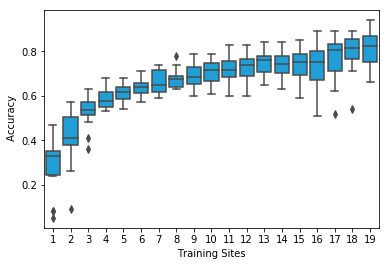

In [6]:
# The above process outputs several files, which I concatenate and print.
# It takes very long to calcualate, so I'll work with the already calculated numbers.
accuracy_per_site = pd.read_csv('intermediate_data/accuracy_per_site_individual.csv', sep=',', header=0)
sns.boxplot(x='Training Sites', y=' Accuracy', data=accuracy_per_site, color='#03A9F4').get_figure().savefig('accuracy_per_site_box') 

In [1]:
from data_reader import DataReader
from data_manipulator import *
import pandas as pd
import numpy as np
import seaborn as sns
from sys import exit
import doc2vec
import data_manipulator
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from run_autoencoder import get_encoder

datareader = DataReader()
df = datareader.get_all_data()
train_x, train_y, test_x, test_y = get_train_test_split(df)
tokens_train, train_y_raw = tokenize_columns(train_x, train_y, save_missing_feature_as_string=False, remove_repeats=True,
                remove_num=True)
tokens_test, test_y_raw = tokenize_columns(test_x, test_y, save_missing_feature_as_string=False, remove_repeats=True,
                remove_num=True)


#d2v
train_x, train_y, _ = tokens_to_doc2vec(tokens_train, train_y_raw)
x = train_x
y = train_y['ON WG IDENTIFIER'].values
print('doc2vec sil score: ' + str(silhouette_score(x, y)))

#bow
train_x, train_y, feature_names = tokens_to_bagofwords(tokens_train, train_y_raw)
x = train_x
y = train_y['ON WG IDENTIFIER'].values
print('bow sil score: ' + str(silhouette_score(x, y)))

#tfidf
corpus = list(map(' '.join, tokens_train[:]))
vectorizer = TfidfVectorizer()
mat = vectorizer.fit_transform(corpus)
print('tfidf score: ' + str(silhouette_score(mat, y)))

#pca
pca = PCA()
pca.fit(train_x.toarray())
var = np.cumsum(pca.explained_variance_ratio_)
n_comp = np.argmax(var > .9) + 1
pca = PCA(n_components=n_comp)
pca.fit(train_x.toarray())
train_x = pca.fit_transform(train_x.toarray())
print('pca score: ' + str(silhouette_score(train_x, y)))


Using TensorFlow backend.


doc2vec sil score: -0.25722834
bow sil score: -0.04758753312752765
tfidf score: -0.018019559041997903
pca score: -0.06758328806007351


# 5.2 Localization - Representation and model evaluation results (Table 5)

In [2]:
from data_reader import DataReader
from data_manipulator import *
from sklearn.decomposition import PCA
%matplotlib notebook
import matplotlib as MPL
import pylab as plt
import numpy as np
import pandas as pd
from data_reader import DataReader
from data_manipulator import *
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import random
import keras
import gzip
import nltk
from Models.clustermodel import Affinity, Birch_, GMM, Hierarchical, Kmeans, Meanshift, Spectral
from Models.lda import Lda
from Models.dbscan import DBscan
from run_autoencoder import get_encoder

Using TensorFlow backend.


In [3]:
DOWNSAMPLE_FRAC = 1.0

# get data
data_reader = DataReader()
df = data_reader.get_all_data()
train_x_raw, train_y_raw, test_x_raw, test_y_raw = get_train_test_split(df)
train_x_raw.drop(['RIS PROCEDURE CODE'], axis=1, inplace=True)
test_x_raw.drop(['RIS PROCEDURE CODE'], axis=1, inplace=True)

# downsample if set on top
subset_df = df.sample(frac=float(DOWNSAMPLE_FRAC))
train_x_raw, train_y_raw, test_x_raw, test_y_raw = get_train_test_split(subset_df)

In [5]:
# identify ON WG IDENTIFIERS that occur infrequently
MIN_CLUSTER_SIZE = 5
train_y_list = train_y_raw['ON WG IDENTIFIER'].values.tolist()
unique_ids = list(set(train_y_list))
small_clusters = list()
for i in unique_ids:
    if train_y_list.count(i) < MIN_CLUSTER_SIZE:
        small_clusters.append(i)
train_x_raw = train_x_raw[~train_y_raw['ON WG IDENTIFIER'].isin(small_clusters)]
train_y_raw = train_y_raw[~train_y_raw['ON WG IDENTIFIER'].isin(small_clusters)]
NUM_CLUSTERS = len(unique_ids) - len(small_clusters)

In [6]:
# append the ON WG IDENTIFIERS to the original documents
train_y_raw = pd.concat([train_x_raw, train_y_raw], axis=1)
test_y_raw = pd.concat([test_x_raw, test_y_raw], axis=1)

# tokenize and subsample
tokens_train, train_y_raw = tokenize_columns(train_x_raw, train_y_raw, regex_string=r'[a-zA-Z0-9]+', 
    save_missing_feature_as_string=False, remove_short=True, remove_num=True, remove_empty=True)
tokens_test, test_y_raw = tokenize_columns(test_x_raw, test_y_raw, regex_string=r'[a-zA-Z0-9]+', 
    save_missing_feature_as_string=False, remove_short=True, remove_num=True, remove_empty=True)


In [7]:
# get representation of data
feature_names = list()
reps = ("bow", "tfidf", "doc2vec", "pca")
train_x = list()
train_y = list()
test_x = list()
test_y = list()
train_x_reps = dict()
test_x_reps = dict()
train_y_reps = dict()
test_y_reps = dict()
VOCAB_SIZE = 0
for r in reps:
    if r == "bow":
        train_x, train_y, feature_names= tokens_to_bagofwords(tokens_train, train_y_raw, CountVectorizer)
        test_x, test_y, _ = tokens_to_bagofwords(tokens_test, test_y_raw, CountVectorizer, feature_names=feature_names)
        train_x = train_x.toarray()
        test_x = test_x.toarray()
        VOCAB_SIZE = str(VOCAB_SIZE)
        #print("done converting to bag of words representation")
    elif r == "bow-ae":
        train_x, train_y, feature_names = tokens_to_bagofwords(tokens_train, train_y_raw, CountVectorizer)
        test_x, test_y, _ = tokens_to_bagofwords(tokens_test, test_y_raw, CountVectorizer, feature_names=feature_names)
        train_x = train_x.toarray()
        test_x = test_x.toarray()
        REP_SIZE = 100
        encoder = get_encoder(train_x, test_x, REP_SIZE)
        train_x = encoder.predict(train_x)
        test_x = encoder.predict(test_x)
    elif r == "tfidf":
        train_x, train_y, feature_names = tokens_to_bagofwords(tokens_train, train_y_raw, TfidfVectorizer)
        test_x, test_y, _ = tokens_to_bagofwords(tokens_test, test_y_raw, TfidfVectorizer, feature_names=feature_names)
        train_x = train_x.toarray()
        test_x = test_x.toarray()
        #print("done converting to tfidf representation")
    elif r == "doc2vec":
        train_x, train_y, _ = tokens_to_doc2vec(tokens_train, train_y_raw)
        test_x, train_y, _ = tokens_to_doc2vec(tokens_test, train_y_raw)
        #print("done converting to doc2vec representation")
    elif r == "pca":
        train_x, train_y, feature_names = tokens_to_bagofwords(tokens_train, train_y_raw, CountVectorizer)
        test_x, test_y, _ = tokens_to_bagofwords(tokens_test, test_y_raw, CountVectorizer, feature_names=feature_names)

        #get number of components
        pca = PCA()
        pca.fit(train_x.toarray())
        var = np.cumsum(pca.explained_variance_ratio_)
        n_comp = np.argmax(var > .9) + 1
        # fit pca
        pca = PCA(n_components=n_comp)
        pca.fit(train_x.toarray())
        train_x = pca.fit_transform(train_x.toarray())
        test_x = pca.fit_transform(test_x.toarray())
    # add to dictionary
    train_x_reps[r] = train_x
    train_y_reps[r] = train_y
    test_x_reps[r] = test_x
    test_y_reps[r] = test_y
    print("done: "+ r)

done: bow
done: tfidf
done: doc2vec
done: pca


In [10]:
# The code to run all the models takes long to run but I can print out the results:
# run models
models = ("kmeans", "birch", "hierarchical", "gmm", "affinity")
print("TRAIN_X SHAPE = " + str(train_x.shape) + ", VOCAB_SIZE = " + str(VOCAB_SIZE) + ", NUM_CLUSTERS = " + str(NUM_CLUSTERS) + ", MIN_CLUSTER_SIZE = " + str(MIN_CLUSTER_SIZE))
if False:
    for m in models:
        for r in reps:
            train_x = train_x_reps[r]
            train_y = train_y_reps[r]
            VOCAB_SIZE = train_x.shape[1]
            NUM_CLUSTERS = NUM_CLUSTERS
            MIN_CLUSTER_SIZE = MIN_CLUSTER_SIZE
            if m == "kmeans":
                kmeans = Kmeans(NUM_CLUSTERS, feature_names, train_x, train_y, r)
                kmeans.eval()
                labels = kmeans.get_labels()
                sil_score = str(kmeans.get_sil_score())
                db_score = str(kmeans.get_db_idx_score())
            if m == "lda":
                # run lda
                lda = Lda(train_x_raw, train_y_raw, 1500, passes=15)
                lda.train()
                print("finished running lda")
            if m == "dbscan":
                # run dbscan
                dbs = DBscan(NUM_CLUSTERS, feature_names, train_x, train_y, r)
                sil_score = str(dbs.get_sil_score())
                db_score = str(dbs.get_sil_score())
            if m == "birch":
                b = Birch_(NUM_CLUSTERS, feature_names, train_x, train_y, r)
                try:
                    sil_score = str(b.get_sil_score())
                    db_score = str(b.get_sil_score())
                except:
                    print("Could not run " +  m + " + " + r)
            if m == "hierarchical": # AKA agglomerative
                h = Hierarchical(NUM_CLUSTERS, feature_names, train_x, train_y, r)
                sil_score = str(h.get_sil_score())
                db_score = str(h.get_sil_score())
            if m == "gmm":
                gmm = GMM(NUM_CLUSTERS, feature_names, train_x, train_y, r)
                sil_score = str(gmm.get_sil_score())
                db_score = str(gmm.get_sil_score())
            if m == "meanshift":
                ms = Meanshift(feature_names, train_x, train_y, r)
                sil_score = str(ms.get_sil_score())
                db_score = str(ms.get_sil_score())
            if m == "spectral":
                sp = Spectral(NUM_CLUSTERS, feature_names, train_x, train_y, r)
                sil_score = str(sp.get_sil_score())
                db_score = str(sp.get_sil_score())
            if m == "affinity":
                af = Affinity(NUM_CLUSTERS, feature_names, train_x, train_y, r)
                sil_score = str(af.get_sil_score())
                db_score = str(af.get_sil_score())
            print(m + ", " + r + ", " + str(sil_score))
else: 
    r = "bow-ae"
    #print(m + ", " + r + ", " + str(sil_score) + ", " + str(db_score))
    print("kmeans, bow, 0.185")
    print("agglomerative, bow, 0.180")
    print("affinity, bow, 0.133")
    print("gmm, bow, 0.106")
    print("birch, bow, 0.173")
    
    print("kmeans, bow-ae, 0.216")
    print("agglomerative, bow-ae, 0.220")
    print("gmm, bow-ae, 0.216")
    print("birch, bow-ae, 0.214")
    
    print("kmeans, tfidf, 0.326")
    print("agglomerative, tfidf, 0.334")
    print("affinity, tfidf, 0.243")
    print("gmm, tfidf, 0.287")
    print("birch, tfidf, 0.288")
    
    print("kmeans, doc2vec, -0.00335")
    print("agglomerative, doc2vec, -0.0161")
    print("affinity, doc2vec, 0.0876")
    print("gmm, doc2vec, 0.110")
    print("birch, doc2vec, 0.215")
    
    print("kmeans, pca, 0.233")
    print("agglomerative, pca, 0.219")
    print("affinity, pca, 0.257")
    print("gmm, pca, 0.148")
    

TRAIN_X SHAPE = (40360, 4132), VOCAB_SIZE = 4132, NUM_CLUSTERS = 731, MIN_CLUSTER_SIZE = 5
kmeans, bow, 0.185
agglomerative, bow, 0.180
affinity, bow, 0.133
gmm, bow, 0.106
birch, bow, 0.173
kmeans, bow-ae, 0.216
agglomerative, bow-ae, 0.220
gmm, bow-ae, 0.216
birch, bow-ae, 0.214
kmeans, tfidf, 0.326
agglomerative, tfidf, 0.334
affinity, tfidf, 0.243
gmm, tfidf, 0.287
birch, tfidf, 0.288
kmeans, doc2vec, -0.00335
agglomerative, doc2vec, -0.0161
affinity, doc2vec, 0.0876
gmm, doc2vec, 0.110
birch, doc2vec, 0.215
kmeans, pca, 0.233
agglomerative, pca, 0.219
affinity, pca, 0.257
gmm, pca, 0.148


# 5.2 Localization - Data size and unseen site evaluation results (Figure 3)

In [12]:
# NOTE: This analysis also takes too long but the resulting plot is shown
# perform downsampling analysis on kmeans + tfidf model
if False:
    r = "tfidf"
    best_mod = "kmeans"
    num_iters = 10
    sil_score_X = np.zeros(shape=(num_iters,10))
    for DOWNSAMPLE_FRAC in np.arange(0.1, 1.0, 0.1):
        for iteration in range(num_iters): # repeat 10 times each
            print(str(DOWNSAMPLE_FRAC) + ", iteration: " + str(iteration))
            # downsample
            subset_df = df.sample(frac=float(DOWNSAMPLE_FRAC))
            train_x_raw, train_y_raw, test_x_raw, test_y_raw = get_train_test_split(subset_df)

            # identify ON WG IDENTIFIERS that occur infrequently
            MIN_CLUSTER_SIZE = 5
            train_y_list = train_y_raw['ON WG IDENTIFIER'].values.tolist()
            unique_ids = list(set(train_y_list))
            small_clusters = list()
            for i in unique_ids:
                if train_y_list.count(i) < MIN_CLUSTER_SIZE:
                    small_clusters.append(i)
            train_x_raw = train_x_raw[~train_y_raw['ON WG IDENTIFIER'].isin(small_clusters)]
            train_y_raw = train_y_raw[~train_y_raw['ON WG IDENTIFIER'].isin(small_clusters)]
            NUM_CLUSTERS = len(unique_ids) - len(small_clusters)

            # append the ON WG IDENTIFIERS to the original documents
            train_y_raw = pd.concat([train_x_raw, train_y_raw], axis=1)
            test_y_raw = pd.concat([test_x_raw, test_y_raw], axis=1)
        
            # tokenize and subsample
            tokens_train, train_y_raw = tokenize_columns(train_x_raw, train_y_raw, regex_string=r'[a-zA-Z0-9]+', 
                save_missing_feature_as_string=False, remove_short=True, remove_num=True, remove_empty=True)
            tokens_test, test_y_raw = tokenize_columns(test_x_raw, test_y_raw, regex_string=r'[a-zA-Z0-9]+', 
                save_missing_feature_as_string=False, remove_short=True, remove_num=True, remove_empty=True)

            kmeans = Kmeans(NUM_CLUSTERS, feature_names, train_x, train_y, r)
            kmeans.eval()
            sil_score = str(kmeans.get_sil_score())
            db_score = str(kmeans.get_db_idx_score())
        
            # store in matrix
            col_index = int((DOWNSAMPLE_FRAC/0.10) - 1)
            row_index = iteration
            #print(str(col_index)+ ','+  str(iteration))
            sil_score_X[iteration, col_index] = sil_score
            #print(sil_score_X)

    df = pd.DataFrame(sil_score_X, columns = ['0.10','0.20', '0.30', '0.40', '0.50', '0.60', '0.70', '0.80', '0.90', '1.0']) 
    ax = sns.boxplot(data=df, color='#03A9F4')
    ax.set(xlabel='Downsample fraction', ylabel='Silhouette Coefficient')
    plt.show()

![sil_score_per_downsample_frac_box.png](attachment:intermediate_data/sil_score_per_downsample_frac_box.png)

# 5.2  Localization - Top keywords (Table 5)

In [18]:
# best performing model was kmeans+tfidf
# get tfidf again
# code from: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
train_x, train_y, feature_names = tokens_to_bagofwords(tokens_train, train_y_raw, TfidfVectorizer)
data = train_x.toarray()
kmeans = Kmeans(NUM_CLUSTERS, feature_names, data, train_y, r)
kmeans.eval()
clusters = kmeans.get_labels()
# group by clusters and get the mean occurence of each word
df = pd.DataFrame(data).groupby(clusters).mean()

# print top n_terms
n_terms = 10
# iterate through each cluster and get the most frequent occuring words
for i,r in df.iterrows():
    print('Cluster {}: '.format(i) + ','.join([str(feature_names[t]) for t in np.argsort(r)[-n_terms:]]))


Cluster 0: body,cr,foot,lt,procedure,calcaneus,port,abdomen,control,fluoro
Cluster 1: dir,unspec,arteriogram,peripheral,mri,leg,mr,lower,bilateral,extremity
Cluster 2: feet,feeding,fd,fct,fb,fatty,fanl,fallopian,ztrio,xa
Cluster 3: feet,feeding,fd,fct,fb,fatty,ztrio,by,obsterician,us
Cluster 4: vascular,chest,pelvis,contrast,with,neck,and,abdomen,ct,thorax
Cluster 5: or,hip,mr,nerve,sciatic,post,left,indirect,knee,arthrogram
Cluster 6: doppler,usywrb,bil,cr,mr,xr,us,dir,bilateral,wrist
Cluster 7: rank,lank,cr,right,lt,routine,more,views,or,ankle
Cluster 8: expira,expiration,cr,xa,dir,abpe,crylithr,right,rf,lithotripsy
Cluster 9: lwrext,cr,portable,recheck,dir,dxforearm,dxclavicle,us,bilateral,foot
Cluster 10: no,contr,csp,and,lumbar,with,contrast,ct,spine,cervical
Cluster 11: fem,feet,feeding,fd,fct,fb,fatty,femur,ztrio,nm
Cluster 12: usyshr,post,port,portable,dir,cr,views,us,right,shoulder
Cluster 13: nipple,markers,abdomen,doppler,dxcervical,dxknee,xr,chest,cr,routine
Cluster 14: dr,

Cluster 144: msk,portable,crhal,left,recheck,us,cr,views,right,hand
Cluster 145: mibg,mbc,xr,dir,view,bone,cr,metastatic,skeletal,survey
Cluster 146: feeding,feet,xr,views,portable,cr,sk,face,bones,nasal
Cluster 147: foot,lower,ext,extremity,port,blw,views,left,ct,calcaneus
Cluster 148: cr,face,contrast,orbits,no,and,ct,head,bones,facial
Cluster 149: chst,quantitative,day,perf,ventiliation,vent,nm,perfusion,scan,lung
Cluster 150: upper,chest,rt,usyaxr,inguinal,dir,bilateral,right,us,axilla
Cluster 151: feet,fem,female,feeding,ztrio,mr,mri,xa,spine,angiography
Cluster 152: limited,portable,ra,xr,views,or,cr,and,coccyx,sacrum
Cluster 153: thyroid,ca,es,id,wb,body,whole,nm,therapy,iodine
Cluster 154: us,routine,upper,gad,hanl,scaphoid,with,mr,left,hand
Cluster 155: ob,us,weeks,midwife,week,hrc,wks,tv,before,obs
Cluster 156: bx,right,asp,portable,bilateral,thorax,biopsy,aspiration,us,chest
Cluster 157: lower,left,dir,portable,port,legs,ext,us,bilateral,thigh
Cluster 158: neuro,mra,msk,brea

Cluster 333: abd,with,mr,and,gad,head,carotids,abdomen,mri,mra
Cluster 334: feeding,ztrio,extremity,upper,portable,right,left,cr,xr,humerus
Cluster 335: female,femb,fem,ztrio,body,abdomen,xa,vascular,stricture,dilation
Cluster 336: femb,ztrio,body,chest,mass,peritoneal,doppler,biopsy,thorax,us
Cluster 337: without,dose,routine,paranasal,wo,unenhanced,contrast,head,ct,sinuses
Cluster 338: female,feet,joint,neuro,bone,injection,musculoskeletal,ct,guided,procedure
Cluster 339: shoulder,extremities,extremity,left,neurovascular,right,mr,wrist,angiography,mri
Cluster 340: cryflupexb,mr,us,dir,fluoroscopy,arm,rf,upper,extremity,bilateral
Cluster 341: dir,ob,general,radiography,crypelvim,fl,abdomen,xr,cr,pelvimetry
Cluster 342: bilateral,elbow,ankle,rf,extremity,spine,arm,xr,unspec,fluoroscopy
Cluster 343: femoral,abdo,ct,no,abdpel,con,multi,drainage,rf,abscess
Cluster 344: rft,lt,calcaneus,rt,views,os,calcis,or,more,calcaneous
Cluster 345: fanl,bone,zamgen,skel,lspine,cr,surv,skeletal,views,s

Cluster 510: female,femb,left,right,leg,lateral,frog,cr,routine,dxhip
Cluster 511: dir,with,xa,for,site,grafogram,angioplasty,dialysis,fist,fistulogram
Cluster 512: cr,dir,crybilstex,removal,liv,percutaneous,rf,biliary,extraction,stone
Cluster 513: ct,contrast,with,cr,crychabd,abdomen,dir,and,chest,cap
Cluster 514: routine,cr,right,lt,left,usyforer,dir,us,forearm,fore
Cluster 515: crmandp,mob,rtn,contrast,with,ct,cr,mand,views,mandible
Cluster 516: femb,fct,fd,mr,abdo,ct,sequences,contrast,without,pelvis
Cluster 517: blw,without,left,guidance,extremity,lower,with,ct,contr,limb
Cluster 518: fct,body,obs,twins,us,portable,pelvis,profile,ob,biophysical
Cluster 519: abdomen,xa,biliary,liv,gastrojejunostomy,ptcd,rf,drainage,tube,change
Cluster 520: ztrio,fem,female,femb,scan,body,whole,mss,nm,mibg
Cluster 521: feeding,extremity,routine,views,portable,stress,right,cr,xr,knee
Cluster 522: mechanical,dir,mryknlc,arthrography,rf,right,arthrogram,us,mr,knee
Cluster 523: femora,female,whole,other

Cluster 655: lo,ab,evaluation,arm,assessment,of,doppler,vascular,us,shunt
Cluster 656: thorax,general,radiography,xr,portable,chest,routine,plus,pa,expiration
Cluster 657: testicles,mob,renal,body,cmp,pelvis,abdo,us,abdomen,ltd
Cluster 658: post,routine,red,bilateral,arm,cr,views,right,mr,humerus
Cluster 659: fanl,head,arm,right,thigh,sinuses,tongue,with,gad,mri
Cluster 660: fct,fb,femora,ztrio,head,neck,contrast,with,ct,mastoid
Cluster 661: femoral,feeding,xa,dir,anigogram,thrombolytic,malignancy,body,nm,therapy
Cluster 662: femoral,fatty,fd,fct,fb,abdomen,abdo,rf,lithotripsy,extracorporeal
Cluster 663: with,rout,gravid,routine,sonohysterogram,ob,us,non,pelvis,tv
Cluster 664: enhanced,extrem,lower,gad,arthrogram,mr,ext,ct,knee,rt
Cluster 665: feet,fem,mag,dmsa,with,gluco,nm,lasix,scan,renal
Cluster 666: femb,bilateral,mg,outside,breast,imaging,mammography,mammogram,screening,obsp
Cluster 667: abdo,cerv,lumb,carotid,plus,pelvis,mr,survey,with,gad
Cluster 668: bx,asp,head,neck,bil,gland

# 5.2  Localization - Selecting optimal number of clusters results (Figure 3a)

In [ ]:
# NOTE: This analysis also takes too long but the resulting plot is shown
# perform downsampling analysis on kmeans + tfidf model
if False:
    # code from: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
    def find_optimal_clusters(max_k, feature_names, train_x, train_y, rep):
        num_samples = train_x.shape[0]
        if max_k > num_samples:
            max_k = num_samples
        iters = [2] + list(range(100, max_k+1, 100))
        ss = []
        for k in iters:
            kmeans = Kmeans(k, feature_names, train_x, train_y, rep)
            ss.append(kmeans.get_sil_score())
            print('Fit '+ str(k)  + ' clusters: ' + str(kmeans.get_sil_score()))

        f, ax = plt.subplots(1, 1)
        ax.plot(iters, ss, marker='o')
        ax.set_xlabel('Number of Cluster Centers (k)')
        ax.set_xticks(iters)
        ax.set_xticklabels(iters)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
        ax.set_ylabel('Silhouette Coefficient')
        ax.set_title('Silhouette Coefficient by Cluster Center Plot')
        plt.show()

![Picture1.png](attachment:intermediate_data/Picture1.png)